# PENYEIMBANGAN DATA MENGGUNAKAN SMOTE DAN ADASYN

## Pentingnya Penyeimbangan Data

Penyeimbangan data adalah langkah penting dalam proses pengolahan data, terutama ketika kita berhadapan dengan dataset yang memiliki distribusi kelas tidak seimbang. Dalam banyak kasus nyata, jumlah sampel dari satu kelas bisa jauh lebih besar dibandingkan kelas lainnya. Kondisi ini menimbulkan masalah serius karena model cenderung bias terhadap kelas mayoritas. Akibatnya, meskipun akurasi terlihat tinggi, performa sebenarnya dalam mengenali kelas minoritas menjadi sangat buruk.

Dengan melakukan penyeimbangan, misalnya melalui metode SMOTE atau ADASYN, kita memberikan kesempatan bagi model untuk mempelajari pola dari kelas minoritas. Hal ini penting agar model tidak hanya “bermain aman” dengan selalu memprediksi kelas mayoritas, tetapi juga mampu mengenali kelas minoritas dengan baik. Dampaknya, evaluasi model tidak hanya terbatas pada akurasi, tetapi juga meningkat pada metrik lain yang lebih adil, seperti recall, precision, F1-score, atau AUC.

Penyeimbangan data juga sangat relevan pada aplikasi-aplikasi kritis, seperti deteksi penyakit langka, transaksi fraud, atau sistem keamanan. Dalam kasus ini, meskipun jumlah data minoritas sedikit, keberhasilan dalam mendeteksinya justru jauh lebih penting dibandingkan sekadar memiliki akurasi tinggi. Dengan demikian, penyeimbangan data membantu model untuk lebih adil, tidak mengabaikan kelas yang sebenarnya paling krusial.

## Metode SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) adalah salah satu metode yang digunakan untuk menangani masalah ketidakseimbangan kelas dalam data. Pada kondisi di mana jumlah sampel kelas minoritas jauh lebih sedikit dibandingkan kelas mayoritas, model machine learning biasanya kesulitan mempelajari pola dari kelas minoritas tersebut. SMOTE ini bisa digunakan untuk mengatasi masalah ini dengan cara membuat data sintetis baru, bukan sekadar menduplikasi data yang sudah ada.

Prinsip kerja SMOTE adalah mencari sampel terdekat dari kelas minoritas, kemudian menghasilkan titik data baru di antara sampel tersebut dengan menggunakan interpolasi. Dengan demikian, data sintetis yang dihasilkan lebih bervariasi dan representatif dibandingkan jika hanya melakukan penyalinan data minoritas secara acak. Pendekatan ini membantu memperluas ruang fitur kelas minoritas, sehingga model dapat mengenali pola dengan lebih baik.

Kelebihan SMOTE adalah kemampuannya meningkatkan performa model dalam mendeteksi kelas minoritas, terutama pada metrik seperti recall dan F1-score. Namun, metode ini juga memiliki keterbatasan. Jika tidak digunakan dengan hati-hati, data sintetis yang dihasilkan bisa terlalu mirip dengan data asli sehingga menimbulkan overfitting, atau bahkan menciptakan noise bila interpolasi dilakukan pada data yang sebenarnya outlier.

## Metode ADASYN

Adaptive Synthetic Sampling (ADASYN) adalah teknik pembelajaran mesin yang digunakan untuk mengatasi ketidakseimbangan dataset dengan menghasilkan sampel sintetis untuk kelas-kelas yang kurang terwakili. Metode oversampling ini meningkatkan kinerja klasifikasi dengan menyeimbangkan dataset dan mengurangi bias terhadap kelas mayoritas, yang umum terjadi dalam aplikasi dunia nyata seperti penelitian medis, deteksi intrusi jaringan, dan deteksi penipuan.

ADASYN bekerja dengan menghasilkan sampel sintetis untuk kelas minoritas berdasarkan ruang fitur dari set data asli. ADASYN menghitung distribusi kepadatan setiap sampel kelas minoritas dan menghasilkan sampel sintetis berdasarkan distribusi kepadatan tersebut. Pendekatan adaptif ini memastikan lebih banyak sampel sintetis dihasilkan untuk sampel kelas minoritas yang lebih sulit dipelajari, sehingga meningkatkan kinerja klasifikasi model pembelajaran mesin.

Keunggulan penggunaan ADASYN dalam aplikasi pembelajaran mesin meliputi: 

1. Peningkatan kinerja klasifikasi untuk kelas-kelas yang kurang terwakili dengan menghasilkan sampel sintetis dan menyeimbangkan dataset. 

2. Pengurangan bias terhadap kelas mayoritas, yang umum terjadi pada dataset yang tidak seimbang. 

3. Peningkatan kemampuan generalisasi model pembelajaran mesin, karena ADASYN berfokus pada pembuatan sampel untuk instans kelas minoritas yang sulit dipelajari. 

4. Dapat diterapkan pada berbagai aplikasi dunia nyata, seperti deteksi intrusi, penelitian medis, dan deteksi penipuan.


Meskipun ADASYN merupakan teknik yang berharga untuk mengatasi dataset yang tidak seimbang, teknik ini memiliki beberapa keterbatasan: 

1. Peningkatan kompleksitas komputasi akibat pembuatan sampel sintetis, yang dapat memengaruhi waktu pelatihan model pembelajaran mesin. 

2. Potensi overfitting, karena sampel sintetis yang dihasilkan mungkin tidak secara akurat merepresentasikan distribusi dasar kelas minoritas yang sebenarnya. 

3. Sensitivitas terhadap derau dan outlier dalam dataset, yang dapat memengaruhi kualitas sampel sintetis yang dihasilkan.

## Perbedaan Utama SMOTE dan ADASYN

ADASYN dan SMOTE (Synthetic Minority Over-sampling Technique) keduanya merupakan teknik oversampling yang digunakan untuk mengatasi ketidakseimbangan dataset. Perbedaan utama di antara keduanya adalah ADASYN menghasilkan sampel sintetis secara adaptif berdasarkan distribusi kepadatan sampel kelas minoritas, sementara SMOTE menghasilkan sampel sintetis dengan melakukan interpolasi antar sampel kelas minoritas. Pendekatan adaptif dalam ADASYN ini membantu untuk lebih berfokus pada sampel yang sulit dipelajari, yang berpotensi menghasilkan kinerja klasifikasi yang lebih baik.

## Langkah-Langkah Penyeimbangan Data

Dibawah ini beberapa kode yang berfungsi untuk menampilkan data ecoli, menyeimbangkan menggunakan metode SMOTE dan ADASYN. Langkah-langkahnya adalah sebagai berikut:

 ### Menginstall Library

Disini saya menggunakan beberapa pustaka Python untuk membantu mengolah data. Pandas digunakan untuk membaca dan mengatur data dalam bentuk tabel, sedangkan NumPy membantu dalam perhitungan angka dan operasi matematika. Untuk membuat grafik atau visualisasi, digunakan Matplotlib agar data lebih mudah dipahami.

Pada tahap pengolahan data, StandardScaler digunakan untuk menstandarkan data supaya setiap fitur berada pada skala yang seimbang, sedangkan MinMaxScaler digunakan untuk mengubah data ke dalam rentang tertentu, biasanya antara 0 sampai 1. Agar label kelas bisa diproses oleh komputer, LabelEncoder digunakan untuk mengubah data kategori menjadi angka.

Selanjutnya, metode PCA (Principal Component Analysis) digunakan untuk mereduksi dimensi data sehingga data yang awalnya memiliki banyak fitur bisa dilihat dalam bentuk grafik 2 dimensi.

Masalah ketidakseimbangan data juga diatasi dengan menggunakan SMOTE dan ADASYN. Kedua metode ini bekerja dengan membuat data tambahan pada kelas yang jumlahnya sedikit, sehingga distribusi data antar kelas menjadi lebih seimbang.

In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\triad\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pandas scikit-learn imbalanced-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\triad\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN, SMOTE  
from sklearn.preprocessing import MinMaxScaler

### Membaca Data

Pembacaan data ini perlu dilakukan agar sistem dapat mengetahui fitur0fitur apa saja yang harus diproses. Karena data ecoli sudah saya ekspor ke bentuk csv, maka membaca file nya menggunakan pd.read_csv

In [4]:
df = pd.read_csv("ecoli.csv")
df

,`id`,`protein_name`,`mcg`,`gvh`,`lip`,`chg`,`aac`,`alm1`,`alm2`,`localization_class`
0,1,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...,...
331,332,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,333,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,334,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,335,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Distribusi Jumlah Sampel Per Kelas Sebelum Penyembangan

Sebelum dilakukan proses penyeimbangan data, saya membuat grafik batang untuk melihat jumlah sampel pada setiap kelas. Grafik ini membantu saya mengetahui apakah data yang digunakan seimbang atau tidak. Dari grafik tersebut biasanya terlihat bahwa ada kelas yang jumlah datanya jauh lebih banyak dibanding kelas lain. Kondisi seperti ini disebut ketidakseimbangan data (imbalanced data), dan jika dibiarkan, bisa membuat model hanya “menyukai” kelas yang jumlahnya besar saja, sementara kelas kecil diabaikan. Karena itu, grafik ini penting sebagai langkah awal untuk memahami kondisi data sebelum dilakukan penyeimbangan dengan metode seperti SMOTE atau ADASYN.

In [5]:
print(df.columns)


Index(['`id`', '`protein_name`', '`mcg`', '`gvh`', '`lip`', '`chg`', '`aac`',
       '`alm1`', '`alm2`', '`localization_class`'],
      dtype='object')


In [6]:
df.columns = df.columns.str.replace("`", "")


In [7]:
X = df.drop(columns=["id", "protein_name", "localization_class"])
y = df["localization_class"]


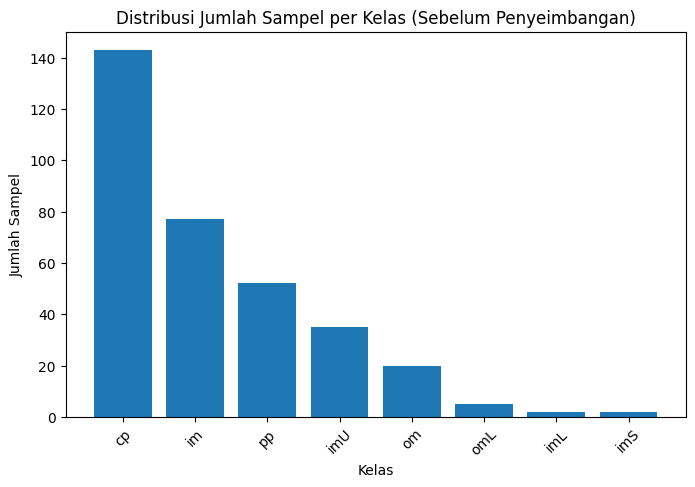

In [8]:
class_counts = y.value_counts()

plt.figure(figsize=(8,5))
plt.bar(class_counts.index, class_counts.values)
plt.title("Distribusi Jumlah Sampel per Kelas (Sebelum Penyeimbangan)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.xticks(rotation=45)
plt.show()

### Perbandingan Data Sebelum dan Sesudah Standarisasi

Pada langkah ini, dilakukan proses standarisasi terhadap data. Sebelum distandarisasi, setiap fitur (kolom) memiliki skala yang berbeda-beda. Misalnya, ada fitur dengan nilai kecil (seperti 0.1 atau 0.2) dan ada juga fitur dengan nilai besar. Hal ini bisa membuat algoritma machine learning sulit membandingkan antar fitur karena perbedaan skala tersebut.

Setelah dilakukan standarisasi menggunakan StandardScaler, semua fitur diubah menjadi skala yang seragam dengan nilai rata-rata mendekati nol dan standar deviasi satu. Dengan cara ini, setiap fitur memiliki pengaruh yang seimbang ketika digunakan dalam pemodelan.

Tabel pertama menunjukkan data asli sebelum standarisasi, sedangkan tabel kedua memperlihatkan data setelah standarisasi. Perubahan ini memastikan data lebih siap digunakan untuk analisis lebih lanjut, seperti PCA maupun oversampling.

In [9]:
df.columns = df.columns.str.replace("`", "")

X = df.drop(columns=["id", "protein_name", "localization_class"])
y = df["localization_class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_before = pd.DataFrame(X.head(), columns=X.columns)
df_after = pd.DataFrame(X_scaled[:5], columns=X.columns)

print(" Sebelum Standarisasi ")
display(df_before)

print("\n Sesudah Standarisasi ")
display(df_after)

 Sebelum Standarisasi 


,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35



 Sesudah Standarisasi 


,mcg,gvh,lip,chg,aac,alm1,alm2
0,-0.051761,-1.419531,-0.175142,-0.054636,0.490781,-1.207717,-0.716084
1,-2.212876,-0.675967,-0.175142,-0.054636,0.327106,-0.697111,-0.285665
2,0.308424,-0.675967,-0.175142,-0.054636,-0.082081,-0.604273,-0.190016
3,0.462790,-0.067597,-0.175142,-0.054636,0.163431,-0.232923,-0.668259
4,-1.389594,-1.216741,-0.175142,-0.054636,0.408944,-1.161299,-0.716084


### Normalisasi Data dengan Min-Max Scaler

Pada bagian ini dilakukan normalisasi data menggunakan metode Min-Max Scaler. Normalisasi bertujuan untuk mengubah nilai setiap fitur ke dalam rentang 0 hingga 1, tanpa mengubah pola hubungan antar data. Dengan cara ini, semua fitur berada pada skala yang sama sehingga tidak ada fitur dengan nilai besar yang mendominasi analisis. Tabel hasil normalisasi memperlihatkan data yang sudah dikonversi, di mana setiap kolom kini memiliki nilai yang konsisten dalam rentang 0 sampai 1.

In [10]:
X = df.drop(columns=["id", "protein_name", "localization_class"])

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

df_norm = pd.DataFrame(X_norm, columns=X.columns)

display(df_norm.head())

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.550562,0.154762,0.0,0.0,0.636364,0.216495,0.353535
1,0.078652,0.285714,0.0,0.0,0.613636,0.329897,0.444444
2,0.629213,0.285714,0.0,0.0,0.556818,0.350515,0.464646
3,0.662921,0.392857,0.0,0.0,0.590909,0.432990,0.363636
4,0.258427,0.190476,0.0,0.0,0.625000,0.226804,0.353535


### Implementasi PCA

Pada tahap ini digunakan metode Principal Component Analysis (PCA) untuk menyederhanakan data. PCA mengambil informasi terpenting dari data yang memiliki banyak variabel, lalu mereduksinya menjadi dua komponen utama (PC1 dan PC2). Dengan cara ini, pola dalam data tetap terjaga meskipun dimensinya dikurangi. Hasilnya berupa data baru dengan dua sumbu utama, sehingga lebih mudah divisualisasikan dalam bentuk scatter plot dan membantu memahami perbedaan antar kelas secara lebih jelas.

In [11]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [12]:
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = y.values

display(df_pca.head())


,PC1,PC2,class
0,-1.290352,-0.324912,cp
1,-1.586012,-1.034683,cp
2,-0.530483,-0.130495,cp
3,-0.261721,0.338264,cp
4,-1.824364,-0.731834,cp


C:\Users\triad\AppData\Local\Temp\ipykernel_1400\1445468488.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(classes))


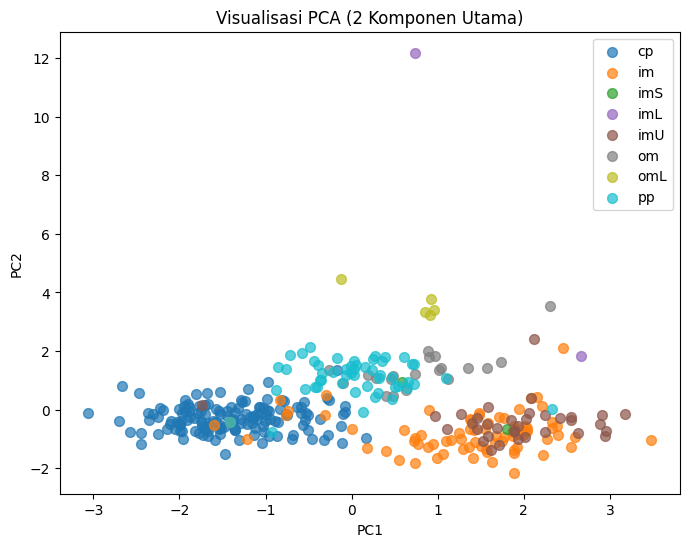

In [13]:
plt.figure(figsize=(8,6))
classes = y.unique()
colors = plt.cm.get_cmap("tab10", len(classes))  

for i, cls in enumerate(classes):
    idx = (y == cls)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], 
                label=cls, color=colors(i), s=50, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA (2 Komponen Utama)")
plt.legend()
plt.show()

Heatmap dibawah ini menampilkan korelasi antar fitur numerik sebelum dilakukan penyeimbangan dengan SMOTE. Setiap sel menunjukkan seberapa kuat hubungan antara dua fitur, dimana warna merah atau biru menunjukkan korelasi tinggi positif atau negatif, sedangkan warna netral menunjukkan korelasi rendah. Visualisasi ini penting untuk memahami struktur data asli dan melihat apakah ada fitur yang sangat terkait satu sama lain. Dengan mengetahui korelasi sebelum SMOTE, kita bisa memastikan bahwa penambahan sampel sintetis nantinya tidak akan merusak pola hubungan antar fitur.

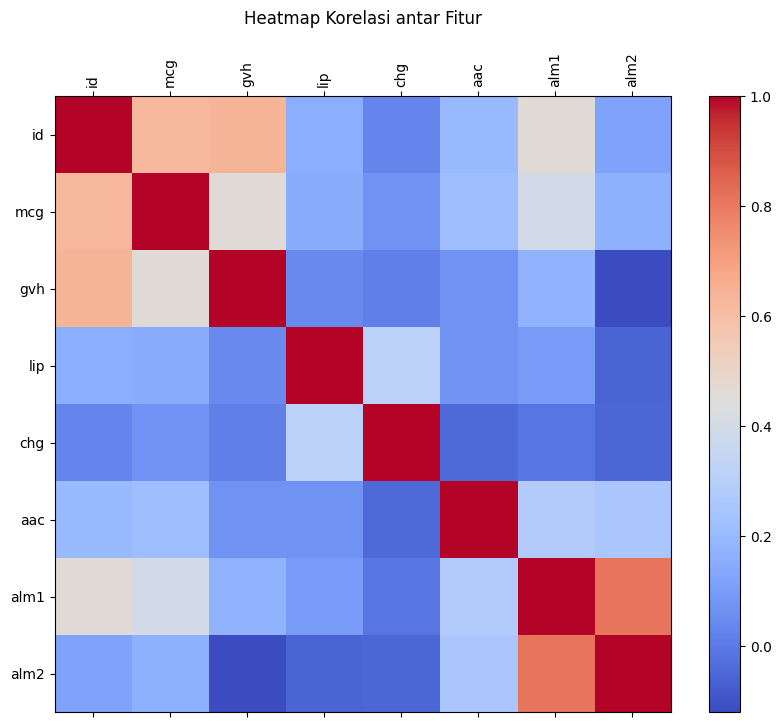

In [14]:
numeric_df = df.drop("localization_class", axis=1).select_dtypes(include=[np.number])

corr = numeric_df.corr().values

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(corr, cmap="coolwarm")
plt.colorbar(cax)

ax.set_xticks(range(len(numeric_df.columns)))
ax.set_yticks(range(len(numeric_df.columns)))
ax.set_xticklabels(numeric_df.columns, rotation=90)
ax.set_yticklabels(numeric_df.columns)

plt.title("Heatmap Korelasi antar Fitur", pad=20)
plt.show()


### SMOTE

Scatter plot ini menampilkan data setelah dikurangi dimensinya menjadi dua komponen utama menggunakan PCA. Setiap titik mewakili satu sampel, dan warnanya menunjukkan kelas masing-masing. Pada data asli, terlihat beberapa kelas memiliki sangat sedikit sampel sehingga titiknya jarang dan distribusinya tidak merata. Kondisi ini dapat membuat model sulit mengenali kelas minoritas. Setelah dilakukan SMOTE, jumlah sampel di kelas-kelas minoritas ditambah dengan membuat titik-titik sintetis. Akibatnya, distribusi antar kelas menjadi lebih seimbang, sehingga model bisa belajar dari semua kelas dengan lebih baik, tanpa kehilangan pola asli data. Scatter plot ini membantu memvisualisasikan perbedaan distribusi sebelum dan sesudah penyeimbangan, serta memastikan bahwa data siap untuk proses pemodelan.

In [15]:
le = LabelEncoder()
y_enc = le.fit_transform(y) 

In [16]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X_scaled, y_enc)

C:\Users\triad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Kode ini digunakan untuk menampilkan bagaimana data terlihat setelah dilakukan penyeimbangan menggunakan SMOTE. SMOTE menambahkan sampel baru untuk kelas-kelas yang jumlahnya sedikit sehingga dataset menjadi lebih seimbang. Setelah itu, data direduksi dimensinya menjadi dua komponen utama menggunakan PCA agar bisa divisualisasikan. Pada plot, titik bulat mewakili data asli, sedangkan tanda silang mewakili data sintetis yang dihasilkan SMOTE. Visualisasi ini membantu melihat distribusi data asli dan data tambahan dari SMOTE, memastikan bahwa pola data tetap mirip namun jumlah sampel di setiap kelas lebih merata.

C:\Users\triad\AppData\Local\Temp\ipykernel_1400\2947857954.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(le.classes_))


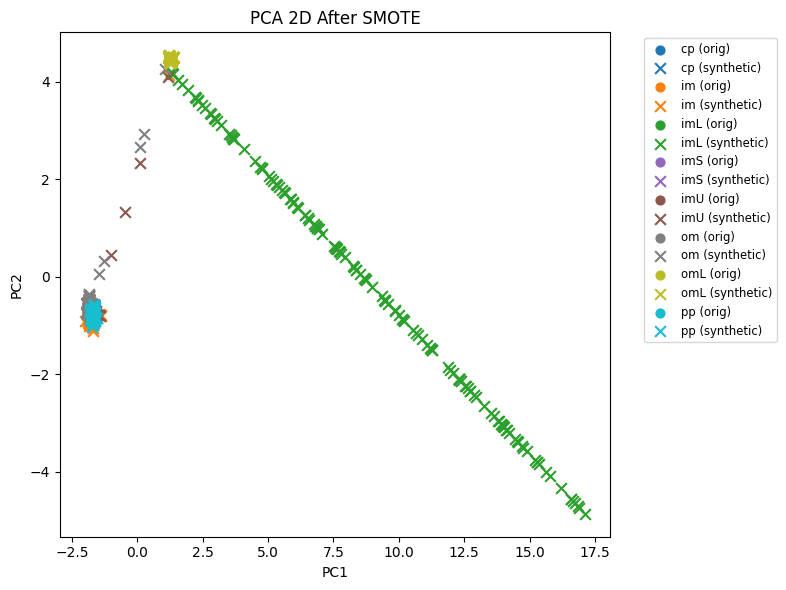

In [17]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_smote)

plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap("tab10", len(le.classes_))
y_labels = le.inverse_transform(y_smote)
synthetic_mask = [not any((X_scaled == x).all() for x in X_scaled) for x in X_smote]

for i, cls in enumerate(le.classes_):
    idx_orig = (y_labels == cls) & (~np.array(synthetic_mask))
    idx_syn  = (y_labels == cls) & (np.array(synthetic_mask))
    plt.scatter(X_pca[idx_orig,0], X_pca[idx_orig,1], label=f"{cls} (orig)", s=40, color=colors(i))
    plt.scatter(X_pca[idx_syn,0], X_pca[idx_syn,1], label=f"{cls} (synthetic)", s=60, marker='x', color=colors(i))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D After SMOTE")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize='small')
plt.tight_layout()
plt.show()

Heatmap dibawah ini menunjukkan korelasi antar fitur setelah dataset diseimbangkan menggunakan SMOTE. Dengan menambahkan sampel sintetis pada kelas yang lebih sedikit, hubungan antar fitur secara umum tetap terlihat konsisten, namun beberapa korelasi bisa sedikit berubah karena adanya variasi dari data baru yang dihasilkan. Jika dibandingkan dengan heatmap sebelum SMOTE, pola korelasi utama antar fitur tetap sama, menandakan bahwa penyeimbangan tidak mengubah hubungan dasar antar fitur, tetapi membantu dataset menjadi lebih seimbang sehingga model nantinya bisa belajar lebih adil dari semua kelas.

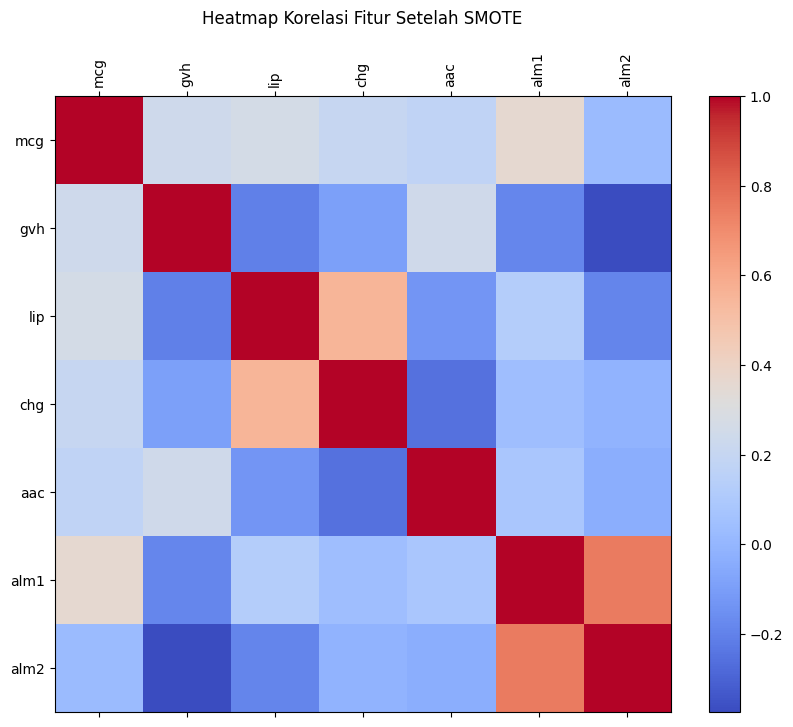

In [18]:
df_smote = pd.DataFrame(X_smote, columns=X.columns)

corr_smote = df_smote.corr().values

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(corr_smote, cmap="coolwarm")
plt.colorbar(cax)

ax.set_xticks(range(len(df_smote.columns)))
ax.set_yticks(range(len(df_smote.columns)))
ax.set_xticklabels(df_smote.columns, rotation=90)
ax.set_yticklabels(df_smote.columns)

plt.title("Heatmap Korelasi Fitur Setelah SMOTE", pad=20)
plt.show()


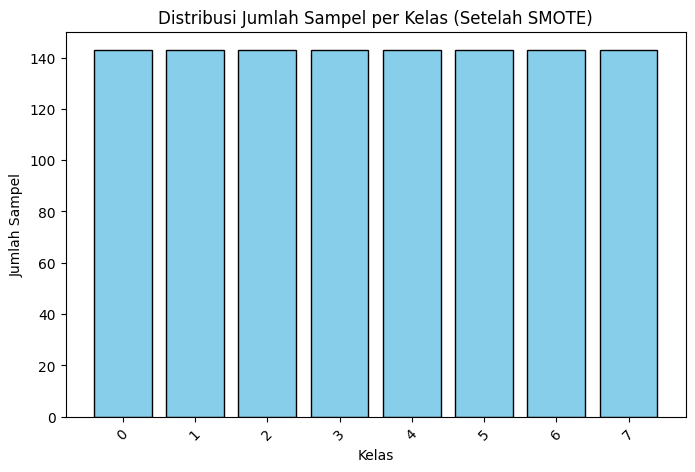

In [19]:
class_counts_smote = pd.Series(y_smote).value_counts()

plt.figure(figsize=(8,5))
plt.bar(class_counts_smote.index, class_counts_smote.values, color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Sampel per Kelas (Setelah SMOTE)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.xticks(rotation=45)
plt.show()


### Tampilan Perbandingan Sebelum data Sesudah Penyeimbangan Data dengan Smote

Pada grafik sebelum penyeimbangan, terlihat bahwa beberapa kelas memiliki jumlah sampel yang sangat sedikit dibandingkan kelas lainnya. Misalnya, ada kelas yang hanya memiliki beberapa sampel sementara kelas mayoritas memiliki puluhan sampel. Ketimpangan ini bisa menyebabkan model machine learning lebih condong memprediksi kelas mayoritas dan kesulitan mengenali kelas minoritas. Setelah diterapkan SMOTE, grafik di sebelah kanan menunjukkan distribusi kelas yang sudah lebih seimbang. Semua kelas kini memiliki jumlah sampel yang hampir sama dengan menggunakan metode SMOTE.

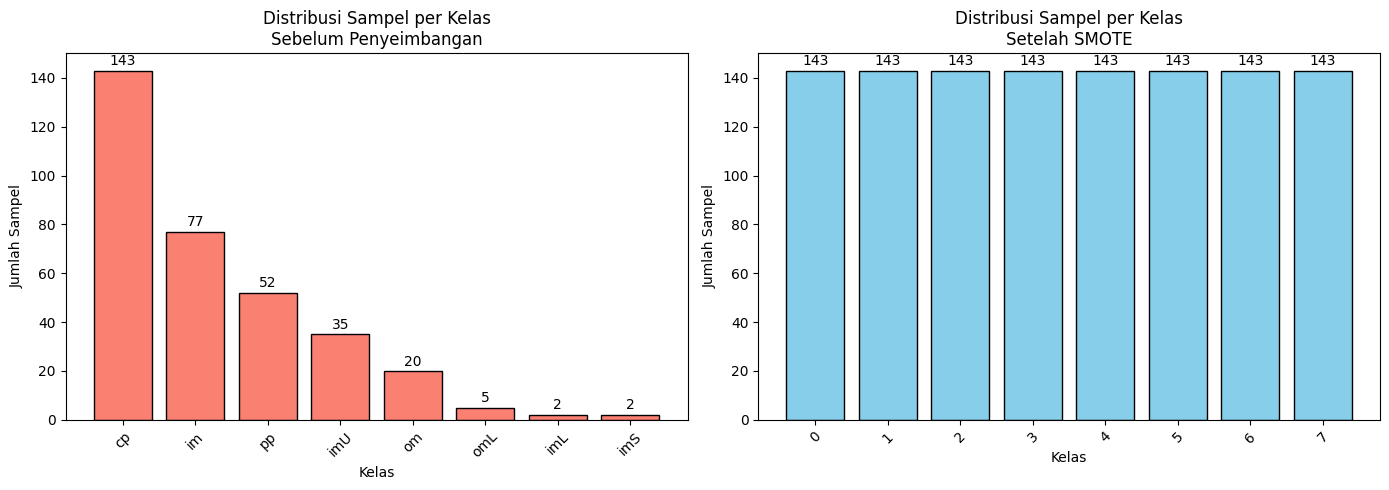

In [20]:
class_counts_before = y.value_counts()
class_counts_after = pd.Series(y_smote).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

bars_before = axes[0].bar(class_counts_before.index, class_counts_before.values, color="salmon", edgecolor="black")
axes[0].set_title("Distribusi Sampel per Kelas\nSebelum Penyeimbangan")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah Sampel")
axes[0].tick_params(axis='x', rotation=45)

for bar in bars_before:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center', va='bottom')

bars_after = axes[1].bar(class_counts_after.index, class_counts_after.values, color="skyblue", edgecolor="black")
axes[1].set_title("Distribusi Sampel per Kelas\nSetelah SMOTE")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah Sampel")
axes[1].tick_params(axis='x', rotation=45)

for bar in bars_after:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### ADASYN 

Pada percobaan menggunakan ADASYN untuk menyeimbangkan dataset Ecoli, muncul error karena metode ini tidak menemukan tetangga dari kelas mayoritas untuk beberapa sampel minoritas. ADASYN bekerja dengan membuat sampel sintetis berdasarkan jarak ke tetangga mayoritas, sehingga jika jumlah sampel minoritas terlalu sedikit atau terlalu terisolasi, proses ini gagal. Dataset Ecoli memiliki banyak kelas minoritas dengan jumlah sampel sangat sedikit, membuat ADASYN tidak bisa menghasilkan data baru dengan benar. Sebagai solusi, metode SMOTE lebih cocok digunakan karena hanya membutuhkan tetangga dari kelas minoritas itu sendiri untuk membuat sampel sintetis, sehingga lebih stabil untuk dataset dengan distribusi kelas yang tidak seimbang dan jumlah sampel minoritas yang kecil. 

In [21]:
adasyn = ADASYN(random_state=42, n_neighbors=1)
X_res, y_res = adasyn.fit_resample(X_scaled, y_enc)

synthetic_mask = np.array([not np.any(np.all(np.isclose(X_scaled, r, atol=1e-8), axis=1)) for r in X_res])
y_labels = le.inverse_transform(y_res)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_res)

plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap("tab20", len(le.classes_))

for i, cls in enumerate(le.classes_):
    idx_orig = (y_labels == cls) & (~synthetic_mask)
    plt.scatter(X_pca[idx_orig,0], X_pca[idx_orig,1], label=f"{cls} (original)", color=colors(i), s=50, alpha=0.7)

    idx_syn = (y_labels == cls) & (synthetic_mask)
    plt.scatter(X_pca[idx_syn,0], X_pca[idx_syn,1], label=f"{cls} (synthetic)", color=colors(i), s=80, marker='X')

plt.title("PCA 2D After ADASYN - Ecoli Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize='small')
plt.tight_layout()
plt.show()

C:\Users\triad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

## Referensi 

https://p3mpi.uma.ac.id/2024/03/08/memahami-teknik-oversampling-minoritas-sintetik-smote/
https://www.activeloop.ai/resources/glossary/adaptive-synthetic-sampling-adasyn/
